In [307]:
import numpy as np

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [351]:
# Complex math
import cmath

def eval_complex_function(f, X, Y):
    """
    f: cmath.complex --> cmath.complex
    X,Y: 1d arrays of coordinates to evalute the function at
    X is real axis, Y is imaginary axis.
    
    Returns a 2d array:
    N = len(x) = len(Y)
    [ f(x[0] + i*y[0]), ..., f(x[0] + i*y[N-1])
      ...               ...                 ...
      f(x[N-1] + i*y[0]), ..., f(x[N-1] + i*y[N-1])
    """
    res = []
    for i in range(len(X)):
        res.append([])
        for j in range(len(Y)):
            res[i].append(f(X[i] + 1j * Y[j]))
    return np.array(res)

# Plotting
def plot_3d(X, Y, Z, cmap=cm.coolwarm):
    """
    Given X, Y, Z (2d), plot the 3d surface.
    """
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, facecolors=cmap,
                           linewidth=0, antialiased=False)
    # TODO: Add a color bar which maps values to colors.
    # fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

def plot_complex(X, Y, Z):
    """
    X, Y: 1d coordinates with same length
    Z: 2d array of complex numbers
    """
    # Define X,Y mesh
    X, Y = np.meshgrid(X, Y)
    
    # Convert Z into 2 2d arrays: magnitude and phase
    Z_magnitude = np.zeros(Z.shape)
    Z_phase = np.zeros(Z.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            z_polar = cmath.polar(Z[i][j])
            Z_magnitude[i][j] = z_polar[0]
            Z_phase[i][j] = z_polar[1]
    
    # Renormalize phase to define colormap
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.Colormap.html
    Z_phase = Z_phase + cmath.pi # [-pi, pi] --> [0, 2pi]
    Z_phase = Z_phase / (cmath.pi*2) # [0, 2pi] --> [0, 1]
    my_col = cm.hsv(Z_phase)
    
    # Plots the 3d surface
    plot_3d(X, Y, Z_magnitude, my_col)

<IPython.core.display.Javascript object>


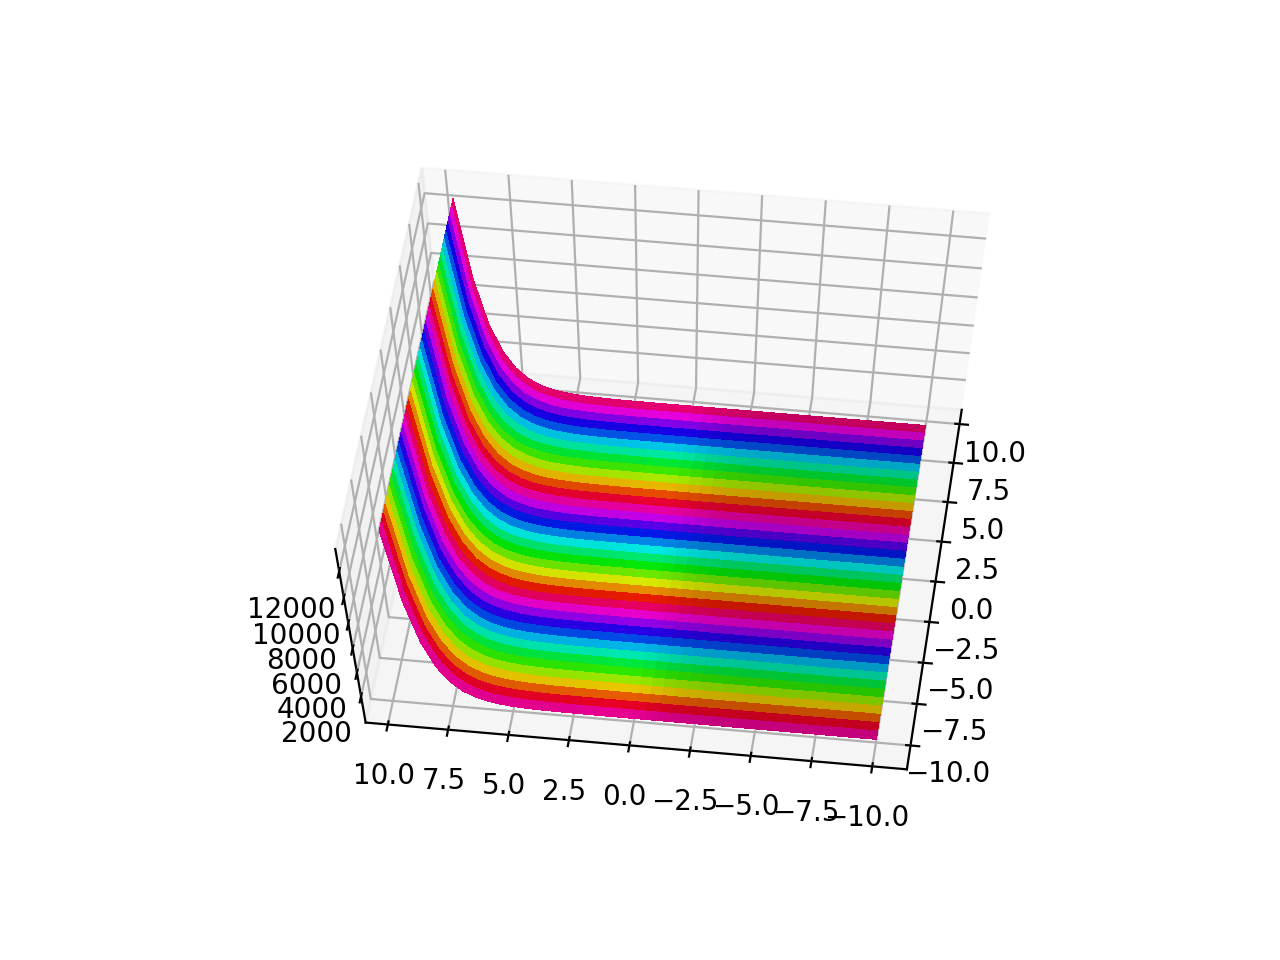

In [353]:
# -------------------------
# MAIN USER INTERFACE
# -------------------------

# Input params for plotting
FRAME_SIZE = 10 # Frame is square centered at zero with 2*FRAME_SIZE length
RESOLUTION = 20 # Evaluation bins per FRAME_SIZE

# Input function
def cmath_f(z):
    return 

# Evaluation and plotting
X = np.arange(-FRAME_SIZE, FRAME_SIZE, FRAME_SIZE/RESOLUTION)
Y = np.arange(-FRAME_SIZE, FRAME_SIZE, FRAME_SIZE/RESOLUTION)
Z = eval_complex_function(cmath_f, X, Y)
plot_complex(X, Y, Z)